In [86]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import re
import matplotlib.pyplot as plt

## Get data

In [2]:
chia_pet_loops = pd.read_csv('ChiA-PET_loops', sep='\t', header=None)

In [147]:
hi_c_loops = pd.read_csv('hi_c_loops.bedpe', sep='\t')

In [4]:
ctcf_chip_seq = pd.read_csv('CTCF-ChiP-seq-peaks', sep='\t', header=None)
rad21_chip_seq = pd.read_csv('Rad21-ChiP-seq-peaks', sep='\t', header=None)

## Edit column names

In [5]:
chia_pet_loops.head(5)

,0,1,2,3,4,5,6
0,chr10,45885,46422,chr10,142944,143595,1
1,chr10,45752,46403,chr10,25485109,25485656,1
2,chr10,49394,49943,chr10,57707,58358,1
3,chr10,50106,50686,chr10,63677,64334,1
4,chr10,52328,52918,chr10,70090,70671,1


In [6]:
col = [str(c) for c in chia_pet_loops.columns.values]
col[:6] = ['char1', 'x1', 'x2', 'char2', 'y1', 'y2']
chia_pet_loops.columns = col
chia_pet_loops = chia_pet_loops.iloc[:,:6]
chia_pet_loops.head(5)

,char1,x1,x2,char2,y1,y2
0,chr10,45885,46422,chr10,142944,143595
1,chr10,45752,46403,chr10,25485109,25485656
2,chr10,49394,49943,chr10,57707,58358
3,chr10,50106,50686,chr10,63677,64334
4,chr10,52328,52918,chr10,70090,70671


In [148]:
hi_c_loops = hi_c_loops.dropna().reset_index(drop=True)
hi_c_loops.head(5)

,#chr1,x1,x2,chr2,y1,y2,name,score,strand1,strand2,...,expectedH,expectedV,fdrBL,fdrDonut,fdrH,fdrV,numCollapsed,centroid1,centroid2,radius
0,10,60880000.0,60890000.0,10,60960000.0,60970000.0,.,.,.,.,...,29.857151,34.565178,5.510599e-06,3.417617e-03,6.518073e-06,4.352302e-03,1.0,60885000.0,60965000.0,0.0
1,10,131900000.0,131910000.0,10,131980000.0,131990000.0,.,.,.,.,...,47.551224,38.399870,4.084538e-06,5.531278e-03,6.420658e-03,5.203196e-06,2.0,131905000.0,131980000.0,5000.0
2,10,71720000.0,71730000.0,10,71810000.0,71820000.0,.,.,.,.,...,56.117943,43.748466,2.594937e-06,2.825991e-06,8.173968e-03,3.346481e-06,2.0,71715000.0,71815000.0,10000.0
3,10,62610000.0,62620000.0,10,62730000.0,62740000.0,.,.,.,.,...,72.266400,52.050930,6.261819e-07,7.079455e-07,5.628446e-03,7.618980e-07,1.0,62615000.0,62735000.0,0.0
4,10,26780000.0,26790000.0,10,26850000.0,26860000.0,.,.,.,.,...,65.557430,90.107475,3.840393e-07,4.753292e-07,5.291055e-07,9.047872e-03,1.0,26785000.0,26855000.0,0.0


In [149]:
col = [str(c) for c in hi_c_loops.columns.values]
col[:6] = ['char1', 'x1', 'x2', 'char2', 'y1', 'y2']
hi_c_loops.columns = col
hi_c_loops = hi_c_loops.iloc[:,:6]
hi_c_loops.head(5)

,char1,x1,x2,char2,y1,y2
0,10,60880000.0,60890000.0,10,60960000.0,60970000.0
1,10,131900000.0,131910000.0,10,131980000.0,131990000.0
2,10,71720000.0,71730000.0,10,71810000.0,71820000.0
3,10,62610000.0,62620000.0,10,62730000.0,62740000.0
4,10,26780000.0,26790000.0,10,26850000.0,26860000.0


In [150]:
hi_c_loops.loc[:, 'char1'] = hi_c_loops['char1'].apply(lambda x: 'chr'+str(x))
hi_c_loops.head(5)

,char1,x1,x2,char2,y1,y2
0,chr10,60880000.0,60890000.0,10,60960000.0,60970000.0
1,chr10,131900000.0,131910000.0,10,131980000.0,131990000.0
2,chr10,71720000.0,71730000.0,10,71810000.0,71820000.0
3,chr10,62610000.0,62620000.0,10,62730000.0,62740000.0
4,chr10,26780000.0,26790000.0,10,26850000.0,26860000.0


In [9]:
ctcf_chip_seq.head(5)

,0,1,2,3,4,5,6,7,8,9
0,chr3,39812740,39813090,.,1000,.,3.89195,-1.0,-0.12016,175
1,chr2,96508234,96508584,.,1000,.,3.90013,-1.0,-0.12088,175
2,chr20,577635,577985,.,1000,.,3.90168,-1.0,-0.12093,175
3,chr14,23094608,23094958,.,1000,.,3.90787,-1.0,-0.12116,175
4,chr3,24683997,24684347,.,743,.,3.91675,-1.0,-0.11554,175


In [10]:
# noticed that they are rounded to 10.000

In [11]:
col = [str(c) for c in ctcf_chip_seq.columns.values]
col[:3] = ['char', 'x1', 'x2']
ctcf_chip_seq.columns = col
ctcf_chip_seq = ctcf_chip_seq.iloc[:,:3]
ctcf_chip_seq.head(5)

,char,x1,x2
0,chr3,39812740,39813090
1,chr2,96508234,96508584
2,chr20,577635,577985
3,chr14,23094608,23094958
4,chr3,24683997,24684347


In [12]:
rad21_chip_seq.head(5)

,0,1,2,3,4,5,6,7,8,9
0,chrX,10119439,10119802,.,1000,.,334.21329,-1.0,4.49182,164
1,chr4,147866870,147867089,.,1000,.,297.61464,-1.0,4.49182,88
2,chr20,34312736,34312962,.,1000,.,288.86682,-1.0,4.49182,119
3,chr10,102009907,102010123,.,1000,.,284.80870,-1.0,4.49182,106
4,chr3,39288401,39288604,.,1000,.,280.73137,-1.0,4.49182,103


In [13]:
col = [str(c) for c in rad21_chip_seq.columns.values]
col[:3] = ['char', 'x1', 'x2']
rad21_chip_seq.columns = col
rad21_chip_seq = rad21_chip_seq.iloc[:,:3]
rad21_chip_seq.head(5)

,char,x1,x2
0,chrX,10119439,10119802
1,chr4,147866870,147867089
2,chr20,34312736,34312962
3,chr10,102009907,102010123
4,chr3,39288401,39288604


## Find loops matching given peaks

In [14]:
ctcf_chip_seq.columns

Index(['char', 'x1', 'x2'], dtype='object')

In [15]:
chia_pet_loops.columns

Index(['char1', 'x1', 'x2', 'char2', 'y1', 'y2'], dtype='object')

In [16]:
chia_pet_loops.head(5)

,char1,x1,x2,char2,y1,y2
0,chr10,45885,46422,chr10,142944,143595
1,chr10,45752,46403,chr10,25485109,25485656
2,chr10,49394,49943,chr10,57707,58358
3,chr10,50106,50686,chr10,63677,64334
4,chr10,52328,52918,chr10,70090,70671


In [112]:
def find_peaks_for_chr(chrx, peaks_df=ctcf_chip_seq, loops_df=chia_pet_loops, thr=0):
    temp_peaks = peaks_df[peaks_df['char']==chrx]
    intervals_peaks = pd.arrays.IntervalArray.from_arrays(
        temp_peaks['x1'].values-thr, 
        temp_peaks['x2'].values+thr, closed='both')

    temp_loops = loops_df[loops_df['char1']==chrx]
    loops_s = pd.arrays.IntervalArray.from_arrays(
        temp_loops['x1'].values, 
        temp_loops['x2'].values, closed='both')

    loops_e = pd.arrays.IntervalArray.from_arrays(
        temp_loops['y1'].values, 
        temp_loops['y2'].values, closed='both')

    temp_loops['s'] = False
#     temp_loops['se'] = False
    
    for p in tqdm(intervals_peaks, desc=chrx, leave=True):
        temp_loops.loc[:, 's'] = temp_loops['s'] | loops_s.overlaps(p)
#         temp_loops.loc[:, 'se'] = temp_loops['s'] | (loops_s.overlaps(p) * loops_e.overlaps(p))
        
    return temp_loops[temp_loops['s']].index.values.tolist()

In [64]:
ctcf_chip_seq['char'].unique()

array(['chr3', 'chr2', 'chr20', 'chr14', 'chr10', 'chr12', 'chr4',
       'chr19', 'chr11', 'chr7', 'chr5', 'chr18', 'chr16', 'chr13',
       'chr1', 'chr21', 'chr6', 'chr22', 'chr8', 'chr9', 'chrX', 'chr15',
       'chr17', 'chrUn_GL000219v1', 'chr17_GL000205v2_random',
       'chr1_KI270714v1_random'], dtype=object)

In [68]:
pd.options.mode.chained_assignment = None  # default='warn'

## Look match for given chromosome only on the start fo the loop

In [69]:
chia_ctcf_match = []
for chri in ctcf_chip_seq['char'].unique():
    chia_ctcf_match = chia_ctcf_match + find_peaks_for_chr(chri, ctcf_chip_seq, chia_pet_loops)

chr1_KI270714v1_random: 100%|███████████████████| 1/1 [00:00<00:00, 1111.96it/s]


In [124]:
chia_pet_loops['ctcf'] = 0
chia_pet_loops.iloc[ chia_ctcf_match, chia_pet_loops.columns.values.tolist().index('ctcf')] = 1

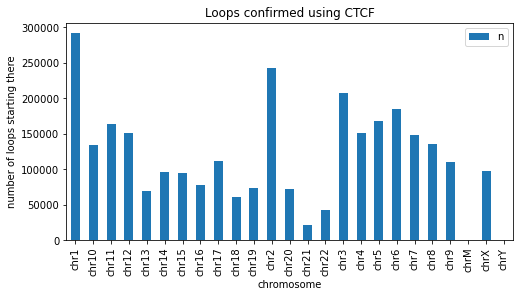

In [125]:
chia_pet_loops.groupby('char1').agg(n=('ctcf', 'sum')).plot(kind='bar', figsize=(8,4))
plt.title('Loops confirmed using CTCF')
plt.xlabel('chromosome')
plt.ylabel('number of loops starting there')
plt.savefig('chia_pet_ctcf.png')

In [114]:
chia_rad21_match = []
for chri in rad21_chip_seq['char'].unique():
    chia_rad21_match = chia_rad21_match + find_peaks_for_chr(chri, rad21_chip_seq, chia_pet_loops)

chr15: 100%|███████████████████████████████| 1145/1145 [00:03<00:00, 377.80it/s]


In [115]:
len(chia_rad21_match)

2549265

In [157]:
len(chia_rad21_match)/chia_pet_loops.shape[0]*100

5.7344244568001805

In [126]:
chia_pet_loops['rad21'] = 0
chia_pet_loops.iloc[ chia_rad21_match, chia_pet_loops.columns.values.tolist().index('rad21')] = 1

In [127]:
chia_pet_loops[chia_pet_loops['ctcf'] != chia_pet_loops['rad21']].shape

(973069, 8)

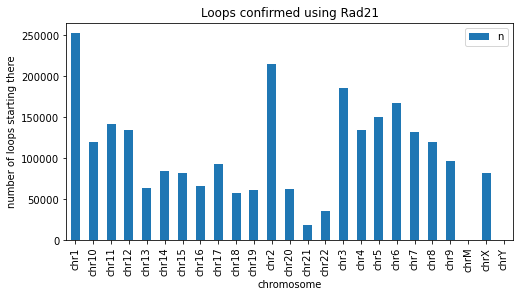

In [128]:
chia_pet_loops.groupby('char1').agg(n=('rad21', 'sum')).plot(kind='bar', figsize=(8,4))
plt.title('Loops confirmed using Rad21')
plt.xlabel('chromosome')
plt.ylabel('number of loops starting there')
plt.savefig('chia_pet_rad21.png')

In [151]:
hic_ctcf_match = []
for chri in ctcf_chip_seq['char'].unique():
    hic_ctcf_match = hic_ctcf_match + find_peaks_for_chr(chri, ctcf_chip_seq, hi_c_loops)

chr1_KI270714v1_random: 100%|████████████████████| 1/1 [00:00<00:00, 804.28it/s]


In [152]:
len(hic_ctcf_match)

11449

In [158]:
len(hic_ctcf_match)/hi_c_loops.shape[0]*100

75.15919385544542

In [169]:
hi_c_loops['ctcf'] = 0
hi_c_loops.iloc[ hic_ctcf_match, hi_c_loops.columns.values.tolist().index('ctcf')] = 1

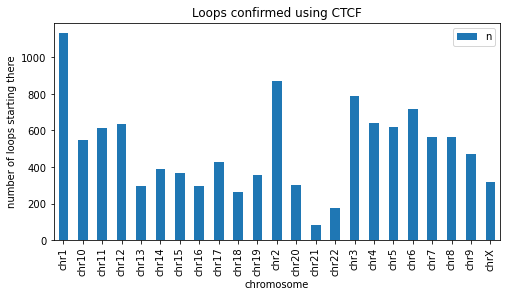

In [170]:
hi_c_loops.groupby('char1').agg(n=('ctcf', 'sum')).plot(kind='bar', figsize=(8,4))
plt.title('Loops confirmed using CTCF')
plt.xlabel('chromosome')
plt.ylabel('number of loops starting there')
plt.savefig('hic_pet_ctcf.png')

In [161]:
hic_rad21_match = []
for chri in ctcf_chip_seq['char'].unique():
    hic_rad21_match = hic_rad21_match + find_peaks_for_chr(chri, rad21_chip_seq, hi_c_loops, 10**4*2)

chr17: 100%|██████████████████████████████| 1435/1435 [00:00<00:00, 2549.79it/s]
chrUn_GL000219v1: 0it [00:00, ?it/s]
chr17_GL000205v2_random: 0it [00:00, ?it/s]
chr1_KI270714v1_random: 0it [00:00, ?it/s]


In [171]:
len(hic_rad21_match)

14457

In [183]:
(~np.isin( hic_ctcf_match, hic_rad21_match)).sum() + (~np.isin( hic_rad21_match, hic_ctcf_match)).sum()

3464

In [184]:
hi_c_loops['rad21'] = 0
hi_c_loops.iloc[ hic_rad21_match, hi_c_loops.columns.values.tolist().index('rad21')] = 1

In [185]:
len(hic_rad21_match)/hi_c_loops.shape[0]*100

94.90579662574673

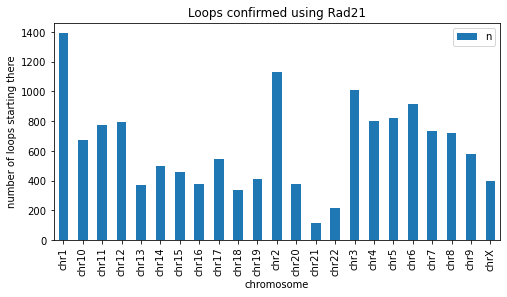

In [186]:
hi_c_loops.groupby('char1').agg(n=('rad21', 'sum')).plot(kind='bar', figsize=(8,4))
plt.title('Loops confirmed using Rad21')
plt.xlabel('chromosome')
plt.ylabel('number of loops starting there')
plt.savefig('hic_pet_rad21.png')

In [188]:
hi_c_loops[hi_c_loops['ctcf'] != hi_c_loops['rad21']].shape

(3464, 8)

## Compare botch approaches

In [189]:
hi_c_loops.shape

(15233, 8)

In [190]:
chia_pet_loops.shape

(44455464, 8)

In [192]:
ctcf_match = []

for chri in ctcf_chip_seq['char'].unique():
    # look where hi-c was matched
    hi_c_tmp = hi_c_loops[(hi_c_loops['char1']==chri)&(hi_c_loops['ctcf']==1)]
    intervals_hic = pd.arrays.IntervalArray.from_arrays(
        hi_c_tmp['x1'].values, 
        hi_c_tmp['x2'].values, closed='both')

    chia_tmp = chia_pet_loops[chia_pet_loops['char1']==chri]
    intervals_chia = pd.arrays.IntervalArray.from_arrays(
        chia_tmp['x1'].values, 
        chia_tmp['x2'].values, closed='both')
    
    chia_tmp['ctcf_hic'] = False
    
    for p in tqdm(intervals_hic, desc=chri, leave=True):
        chia_tmp.loc[:, 'ctcf_hic'] = chia_tmp['ctcf_hic'] | intervals_chia.overlaps(p)
        
    ctcf_match = ctcf_match + chia_tmp[chia_tmp['ctcf_hic']].index.values.tolist()

chr17: 100%|█████████████████████████████████| 427/427 [00:01<00:00, 274.53it/s]
chrUn_GL000219v1: 0it [00:00, ?it/s]
chr17_GL000205v2_random: 0it [00:00, ?it/s]
chr1_KI270714v1_random: 0it [00:00, ?it/s]


In [194]:
chia_pet_loops['ctcf_hic'] = 0
chia_pet_loops.iloc[ ctcf_match, chia_pet_loops.columns.values.tolist().index('ctcf_hic')] = 1

In [193]:
rad21_match = []

for chri in ctcf_chip_seq['char'].unique():
    # look where hi-c was matched
    hi_c_tmp = hi_c_loops[(hi_c_loops['char1']==chri)&(hi_c_loops['rad21']==1)]
    intervals_hic = pd.arrays.IntervalArray.from_arrays(
        hi_c_tmp['x1'].values, 
        hi_c_tmp['x2'].values, closed='both')

    chia_tmp = chia_pet_loops[chia_pet_loops['char1']==chri]
    intervals_chia = pd.arrays.IntervalArray.from_arrays(
        chia_tmp['x1'].values, 
        chia_tmp['x2'].values, closed='both')
    
    chia_tmp['rad21_hic'] = False
    
    for p in tqdm(intervals_hic, desc=chri, leave=True):
        chia_tmp.loc[:, 'rad21_hic'] = chia_tmp['rad21_hic'] | intervals_chia.overlaps(p)
        
    rad21_match = rad21_match + chia_tmp[chia_tmp['rad21_hic']].index.values.tolist()

chr17: 100%|█████████████████████████████████| 547/547 [00:02<00:00, 248.96it/s]
chrUn_GL000219v1: 0it [00:00, ?it/s]
chr17_GL000205v2_random: 0it [00:00, ?it/s]
chr1_KI270714v1_random: 0it [00:00, ?it/s]


In [195]:
chia_pet_loops['rad21_hic'] = 0
chia_pet_loops.iloc[ rad21_match, chia_pet_loops.columns.values.tolist().index('rad21_hic')] = 1

In [198]:
chia_pet_loops[
    (chia_pet_loops['ctcf'] == chia_pet_loops['ctcf_hic']) &
    (chia_pet_loops['ctcf_hic'] == 1)
].shape

(1023963, 10)

In [199]:
chia_pet_loops[
    (chia_pet_loops['rad21'] == chia_pet_loops['rad21_hic']) &
    (chia_pet_loops['rad21_hic'] == 1)
].shape

(971662, 10)

In [200]:
1023963/2549265

0.40166989308683093

In [201]:
971662/2549265 

0.3811537835415306